Classification


In [78]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [7]:
#Load the dataset from a CSV file)
cc_dat = pd.read_csv('creditcard.csv')
cc_dat.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#Check dimension and info (datatype of variables)
print(cc_dat.shape)
print(cc_dat.info())

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [12]:
#1. Importing required libraries
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [11]:
#2. Select the target variables (y) and feature variables (x)
df_x = pd.DataFrame(cc_dat.drop(['Class'], axis = 1))
df_y = pd.DataFrame(cc_dat['Class'])

**2. Data Exploration**

**a. Missing values and Duplicates**

In [10]:
#Check if there is any missing values in dataset
df_missing = cc_dat.isna().sum()
df_missing #As a result, there is no missing value


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**b. Distribution**

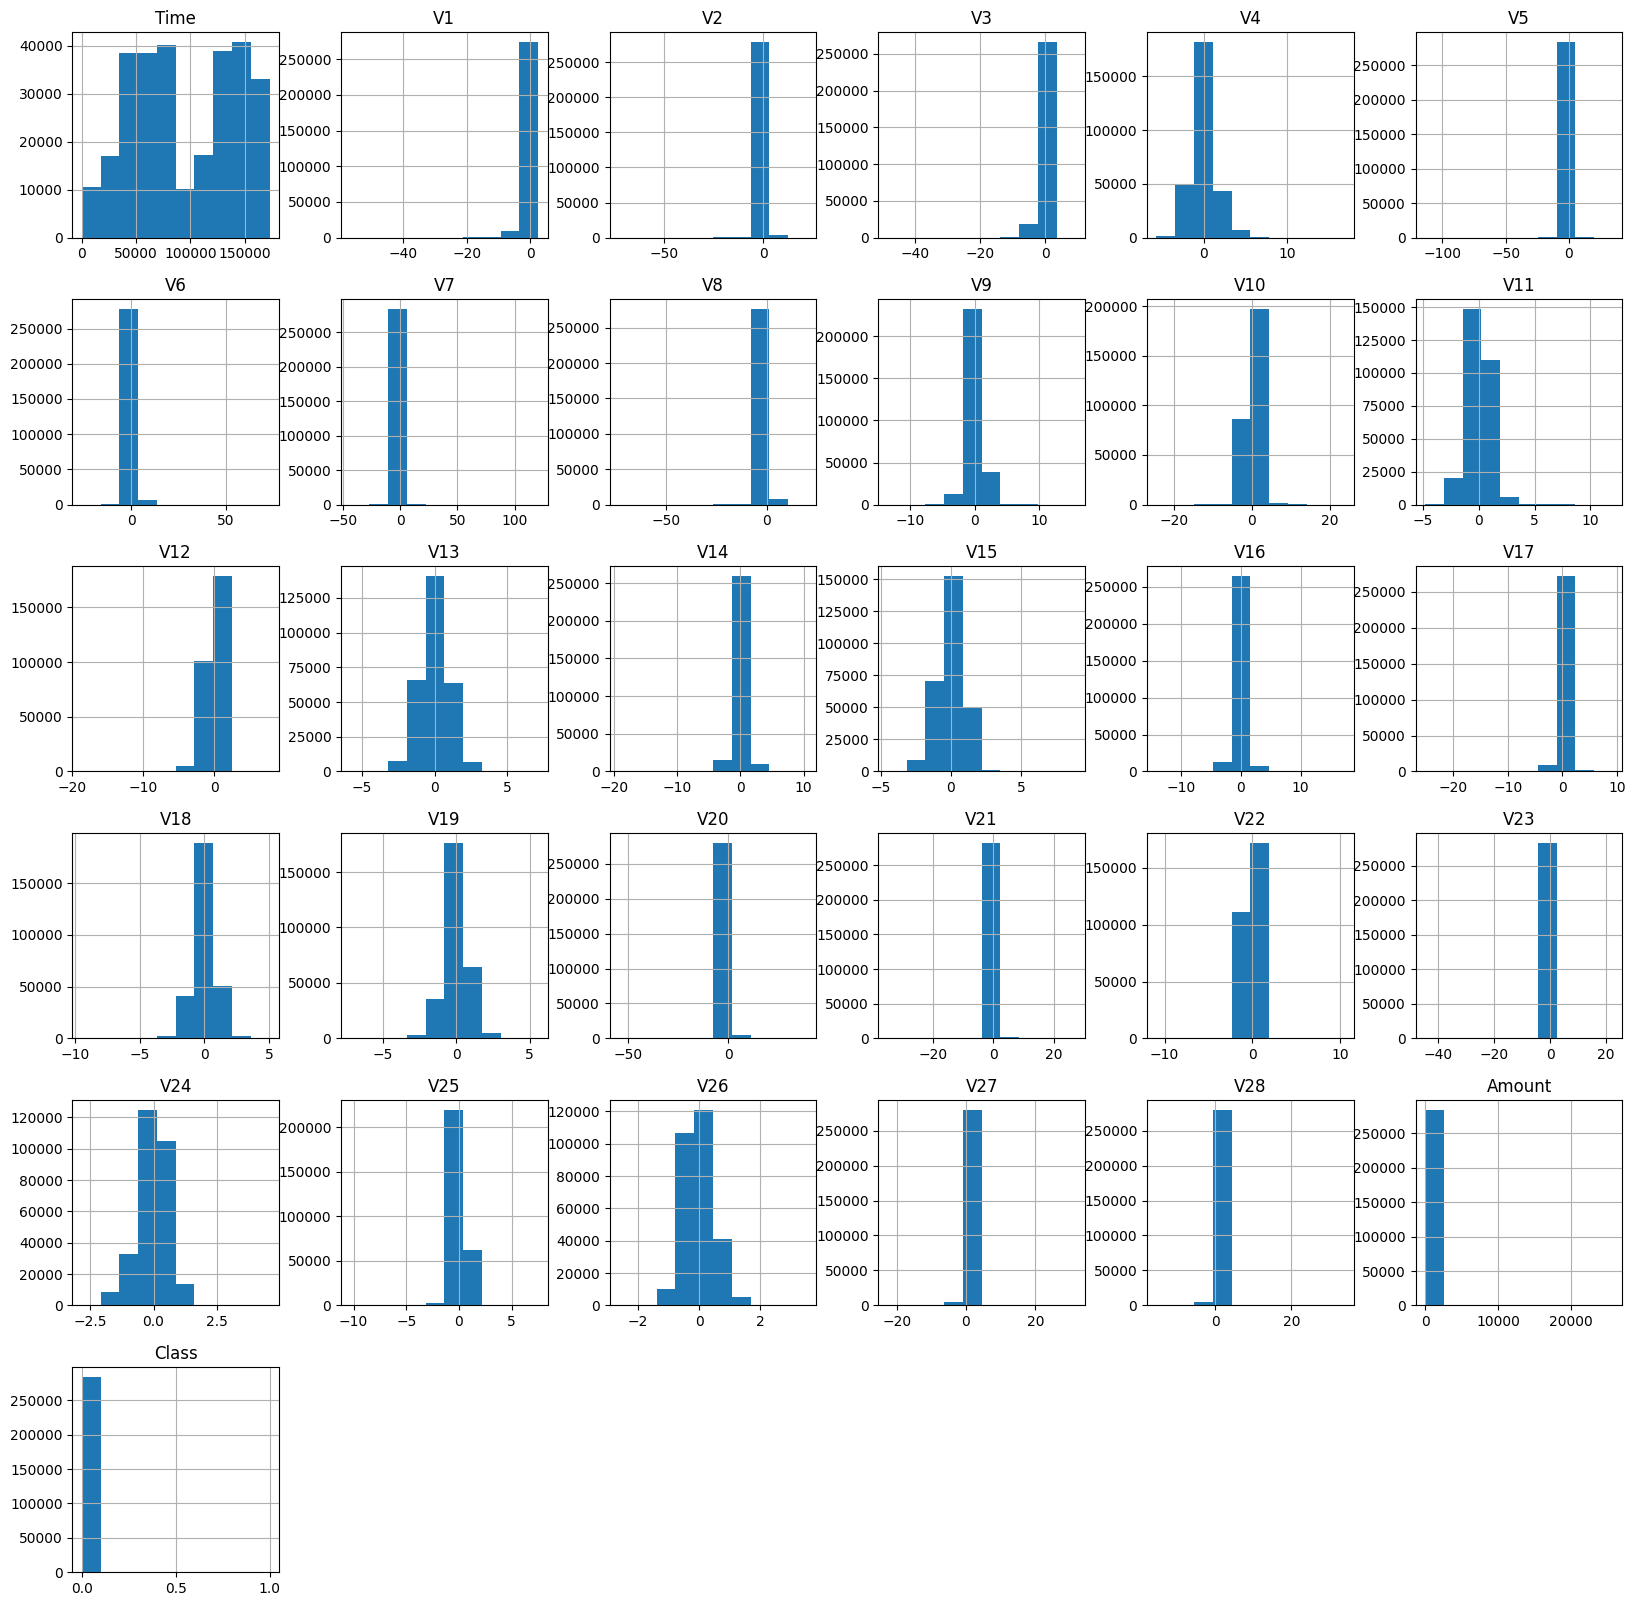

In [13]:
#Use histogram to understand th distribution
cc_dat.hist(figsize = (20,20))
plt.show()

As we can see in the hisogram, there are **skewed distributions** of many attributes. As below, we can mitigate this skewness

In [14]:
#Import PowerTransformer
from sklearn.preprocessing import PowerTransformer
#Instantiate the powertranformer
pt = PowerTransformer()
#Fit and transform the data
x_transformed = pt.fit_transform(df_x)
# Recreate the DataFrame with transformed features and original target
cc_dat_transformed = pd.DataFrame(x_transformed, columns=df_x.columns)
cc_dat_transformed['Class'] = df_y.values  # Add the target variable back

In [15]:
# Check the transformed data
print(cc_dat_transformed.head())

       Time        V1        V2        V3        V4        V5        V6  \
0 -2.434947 -0.904815 -0.131503  2.176074  0.983588 -0.256110  0.459227   
1 -2.434947  0.626390  0.093067 -0.035062  0.387928  0.031947  0.045846   
2 -2.434688 -0.904242 -0.871858  1.381297  0.341811 -0.374492  1.320901   
3 -2.434688 -0.742857 -0.202760  1.401049 -0.581136 -0.019151  0.983351   
4 -2.434458 -0.823641  0.530197  1.160592  0.357540 -0.305614  0.187360   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.193516  0.020305  0.380443  ... -0.007670  0.366644 -0.189647  0.015102   
1 -0.063874  0.006711 -0.184488  ... -0.298760 -0.884170  0.153342 -0.637483   
2  0.639714  0.172348 -1.453859  ...  0.357879  1.069496  1.501808 -1.133450   
3  0.191907  0.309141 -1.319689  ... -0.133275 -0.013060 -0.317680 -1.756645   
4  0.479194 -0.331706  0.769520  ...  0.004660  1.107811 -0.232990  0.145885   

        V25       V26       V27       V28    Amount  Class  
0  0.21

**c. Dimension Reduction**

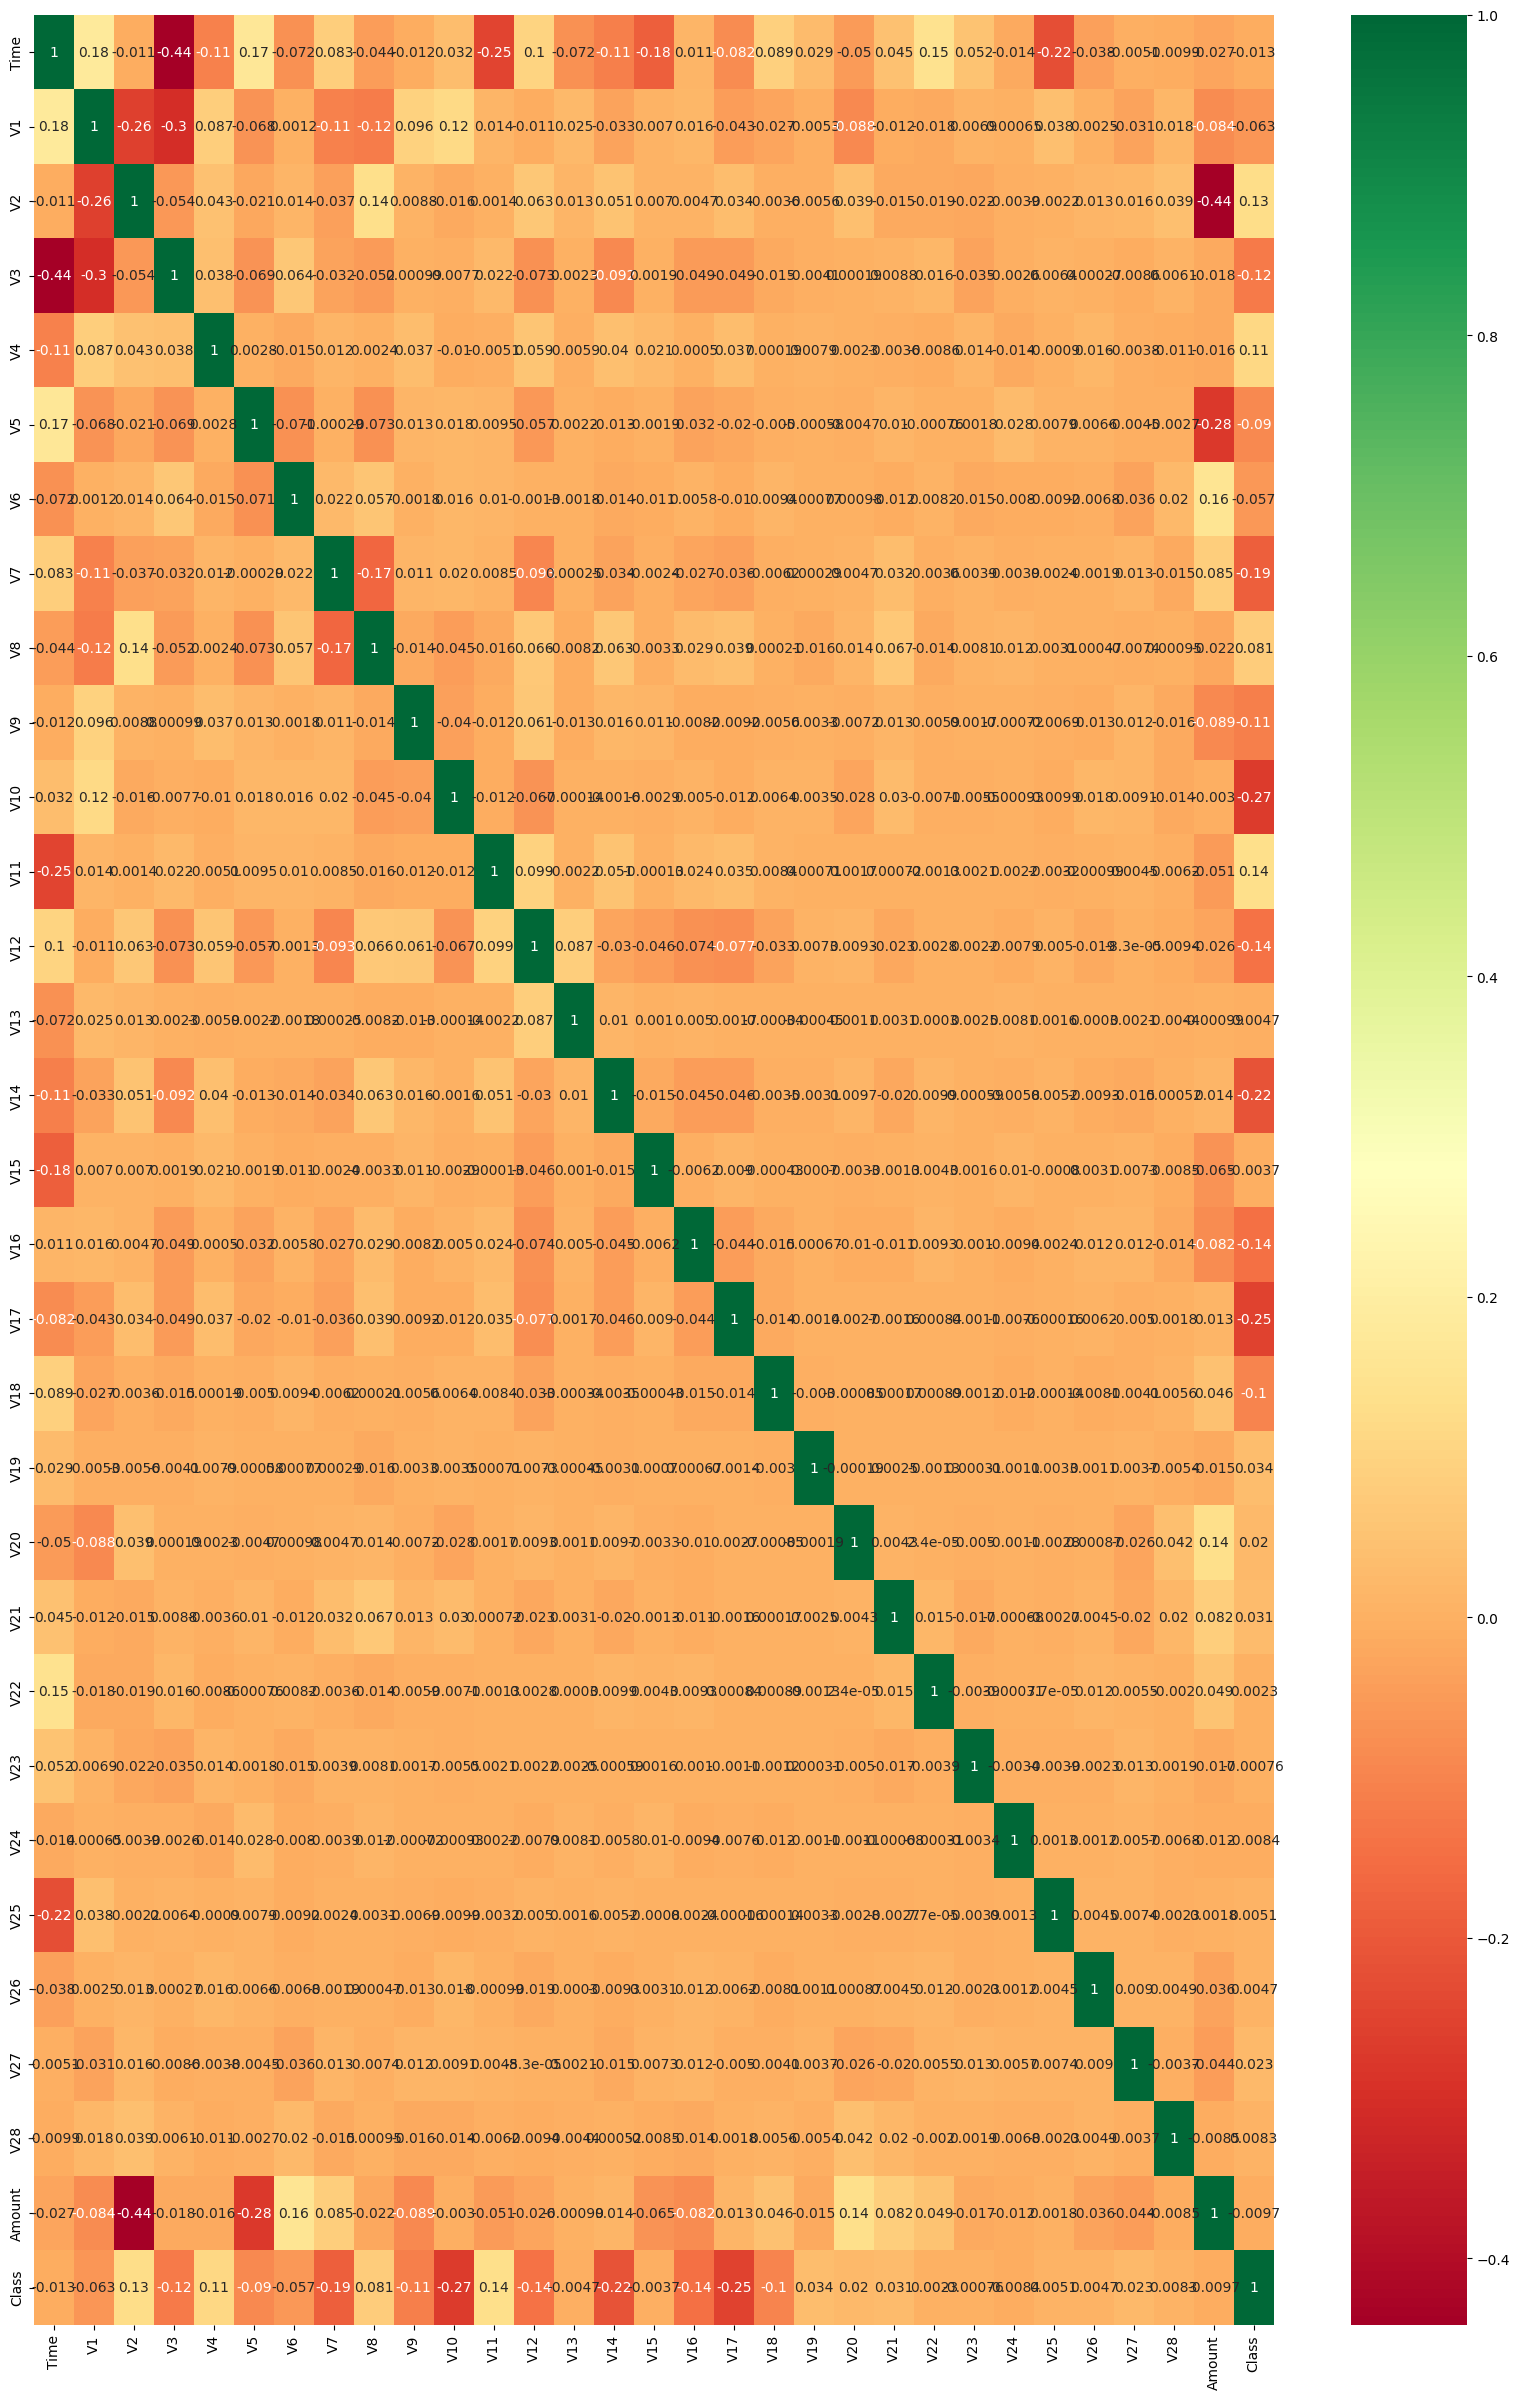

In [16]:
# Correlation matrix to reduce dimension
# Correlation Matrix
corrmat = cc_dat_transformed.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,30))
#plot heat map
g=sns.heatmap(cc_dat_transformed[top_corr_features].corr(),annot=True,cmap="RdYlGn")


**Justification**:
I choose **0.6 as a practical cut-off**.
A correlation of -0.013 indicates that changes in the ***Time*** variable do not predict change in the *Class*, or we can say it **is not a useful predictor** of fraud.
As a result, I gonna drop it out from dataset using train the predictive models.



In [17]:
#Drop "Time" column
cc_dat_transformed.drop(['Time'], axis = 1, inplace = True)

**2. Predictive Model 1 (Logistic Decision Tree)**
I use SMOTE(Synthetic Minority Oversampling Technique)

In [56]:
# Separate the features and target variable for splitting
X_transformed = cc_dat_transformed.drop(columns=['Class'])
y = cc_dat_transformed['Class']

# Split the data with stratification to maintain class balance in train and test sets
X_train, X_test, y_train, y_val = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42, stratify=y
)


In [57]:
#Import SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

#Instantiate SMOTE
sm = SMOTE(random_state =27)


# Separate features and target variable
X = cc_dat_transformed.drop('Class', axis=1)
y = cc_dat_transformed['Class']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Scale the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)


In [63]:
#Train a logistic regression model
model = linear_model.LogisticRegression(random_state=42, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(class_weight='balanced', random_state=42)

In [64]:
#Training accuracy
Y_train_predict = model.predict(X_train_resampled)
#Validation accuracy
Y_val_predict = model.predict(X_test)

**3. Model Evaluation**

In [65]:
#Import metrics lib
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report, f1_score, roc_auc_score, roc_curve

**a. Classification Accuracy**

In [66]:
# Error calculation
error_train = accuracy_score(Y_train_predict, y_train_resampled)
print('Training Classif Accuracy: ' + str(error_train))
error_val = accuracy_score(Y_val_predict, y_val)
print('Validation Classif Accuracy: ' + str(error_val))

Training Classif Accuracy: 0.9510290128423264
Validation Classif Accuracy: 0.9710508760226115


**b. Confusion Matrix**

In [67]:
confusion_matrix(y_val, Y_val_predict)

array([[55224,  1640],
       [    9,    89]])

**c. Classification Report**

In [70]:
from sklearn.metrics import precision_recall_curve, classification_report
# Get probabilities for class 1
y_val_probs = model.predict_proba(X_test)[:, 1]

# Determine the optimal threshold based on the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_val, y_val_probs)
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that gives the best F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.2f}")

# Predict using the optimal threshold
y_val_optimal = (y_val_probs >= optimal_threshold).astype(int)

# Evaluate with the optimal threshold
report = classification_report(y_val, y_val_optimal)
print('Validation report with adjusted threshold\n', report)


Optimal Threshold: 1.00
Validation report with adjusted threshold
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



**Justification**: The balance between precision and recall suggest the model is effectively identifying the minority class without over-predicting it


**e. ROC Curve**

In [72]:
auc = roc_auc_score(y_val, Y_val_predict)
print('Validation AUC: ' + str(auc))

Validation AUC: 0.9396612612405683


**GridSearch based parameter tuning**

In [76]:
#Use Gridsearch strategy to find the best parameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from imblearn.pipeline import Pipeline

In [79]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling inside pipeline
    ('smote', SMOTE(random_state=42)),  # Applying SMOTE
    ('model', LogisticRegression(random_state=42, class_weight='balanced'))  # Logistic Regression
])

# Define the parameter grid
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'model__penalty': ['l1', 'l2'],  # L1 or L2 penalty
    'model__solver': ['liblinear', 'saga'],  # Compatible solvers
}

# Define scoring function focused on F1 score for minority class
scorer = make_scorer(f1_score, pos_label=1)

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring=scorer, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best F1 Score: {best_score:.2f}")

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_test)

# Generate classification report
report = classification_report(y_val, y_val_pred)
print('Validation Report with Fine-Tuned Model\n', report)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'model__C': 0.01, 'model__penalty': 'l1', 'model__solver': 'saga'}
Best F1 Score: 0.10
Validation Report with Fine-Tuned Model
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.53      0.62        98

    accuracy                           1.00     56962
   macro avg       0.88      0.77      0.81     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
